## Doctor Right


#### Import Library

In [1]:
import sys
sys.path.append("../modules")
from eda import EDAAnalyzer
from spark_session import SparkManager
from feature_engineering import FeatureEngineer

In [2]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

#### Constants and config

In [3]:
mx_submits_path = "../data_sample/mx_submits.parquet/"
mx_submits_line_path = "../data_sample/mx_submitsline.parquet/"


sample_patient_id = "8aad41f612a7095449888c8050abaeb05fdee65643caa3033542610421d8bd1daaa2c4ce1757401003a1bbcd60948a7aa13eba507a676dea80e0cf76b77dbc95"
features_cols = ['secondary_payer_state',
'billing_provider_address_precision',
'billing_provider_address_region',
'claim_filing_indicator_pay_type',
'claim_institutional_or_professional',
'facility_provider_address_precision',
'facility_provider_address_region',
'inpatient_discharge_status_code',
'organization_npi_type_code',
'organization_sourced_from',
'organization_taxonomy_group',
'patient_gender',
'patient_id',
'patient_location_residential_region',
'primary_payer_pay_type',
'primary_payer_plan_type',
'principal_diagnosis_body_part',
'principal_diagnosis_category',
'principal_diagnosis_code_set',
'principal_procedure_code_set',
'referring_provider_taxonomy_group',
'rendering_provider_npi_type_code',
'rendering_provider_taxonomy_group',
'secondary_payer_claim_filing_indicator_code',
'secondary_payer_pay_type',
'secondary_payer_plan_type',
'claim_all_diagnosis_codes',
'claim_total_charge_amount',
'previous_diagnosis_ohe',
'claim_all_diagnosis_ohe']
exclude_cols = ['patient_id']
most_repeated_diagnosis_list = [] 

### Spark Session

In [4]:
mx_submits_spark_manager = SparkManager(mx_submits_path)
# mx_submits_line_spark_manager = SparkManager(mx_submits_line_path)

24/10/04 01:37:57 WARN Utils: Your hostname, Sureshs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.20.9.214 instead (on interface en0)
24/10/04 01:37:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/04 01:37:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### MX SUBMITS

#### EDA

In [5]:
mx_submits_eda = EDAAnalyzer(mx_submits_spark_manager)

In [6]:
mx_submits_eda.display_head()

24/10/01 22:30:35 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,type_of_bill_frequency_description,vendorname,cycle_id,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type
0,a6db914db401522b72e75765b0c8915a,f74909ace68e51891440e4da0b65a70c,323f1fff09390aad4c11c4e3c3d694fe,None,"LAS VEGAS-HENDERSON-PARADISE, NV",Henderson,Clark,3005WHORIZONRIDGEPKWYHENDERSONNV89052,35.998154,-115.119797,...,None,cyan,full_20240611,1944,M,e0e2f2ab3660008f963219f5da377d1e16b302a936951c...,None,None,None,NaN
1,28cd641bca90ccc956666d3d427208f2,6e116682aeba6cd8a5341a9bc3b6f020,da4a4cff3fb363e215eca0779812b117,None,"PARSONS, KS",Parsons,Labette,1902SUSHIGHWAY59PARSONSKS67357,37.320053,-95.264801,...,Admit Through Discharge Claim,cyan,full_20240611,1943,F,64bf854d4bc6350af1c5edc74fe816d23d9d9ecc965cae...,37.676598,-95.472107,66720,1.0
2,7c2a727611dca1435166631a665b7f21,767ef4cac69e8a0c77384f6e1414364b,f4048466449529193e43c6231c6b4f80,None,"PHILADELPHIA-CAMDEN-WILMINGTON, PA-NJ-DE-MD",Woodbury,Gloucester,26EREDBANKAVEWOODBURYNJ08096,39.843605,-75.148361,...,Admit Through Discharge Claim,cyan,full_20240611,1971,M,be3296ca5e261d0300048ece4a74ce6d775f3449a77702...,40.227833,-75.240562,19454,1.0
3,6d014626abbddd193950839be7859c43,0e6b9e4a0d9103c5a9c4f1332d38ef53,781bac90c394b3566e29c81dc925ed3d,None,"MONTGOMERY, AL",Montgomery,Montgomery,2055NORMANDIEDRMONTGOMERYAL36111,32.328972,-86.27977,...,Admit Through Discharge Claim,cyan,full_20240611,1946,F,0025ac2b4ff09bd1505307140b30a7c7f53f9645efa5f4...,32.902707,-85.382338,36855,2.0
4,dfd62d19b9ec0891cf714d5d486736d,767ef4cac69e8a0c77384f6e1414364b,adf9dafa1dc75bec5f501c724d275b46,None,"AUSTIN-ROUND ROCK-GEORGETOWN, TX",Austin,Travis,2170WOODWARDSTAUSTINTX78744,30.212395,-97.745186,...,None,cyan,full_20240611,1996,M,59baeef7b06d85ab2f180a860201c2c1e8c931d48b614c...,40.742847,-82.530979,44903,1.0


In [7]:
mx_submits_eda.display_shape()

'Shape of data: rows: 247334, cols: 127'

#### Type conversion

In [8]:
mx_submits_eda.convert_columns_to_float(["claim_total_charge_amount"])

Casted claim_total_charge_amount to float


In [6]:
column_info_submits = mx_submits_eda.display_column_info()
column_info_submits.to_csv("../output/column_info_submits.csv")
column_info_submits

24/09/29 17:51:08 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats,distinct_count
0,claim_number,247334,100.000000,28,32,1.0,a6db914db401522b72e75765b0c8915a,string,4182b93e71c2c46d88683dd749d3cc04,1.0,247334
1,vendorname,247334,100.000000,4,4,247334.0,cyan,string,cyan,247334.0,1
2,clearinghouse_received_date,247334,100.000000,2015-01-02,2024-09-06,4037.0,2019-09-05,date,2018-02-03,4037.0,3531
3,cohort_key,247334,100.000000,32,32,62351.0,f74909ace68e51891440e4da0b65a70c,string,f74909ace68e51891440e4da0b65a70c,62351.0,4
4,claim_id,247334,100.000000,28,32,1.0,a6db914db401522b72e75765b0c8915a,string,a34f778795a121c257567fd41ffe839e,1.0,247334
...,...,...,...,...,...,...,...,...,...,...,...
122,secondary_payer_plan_type,2542,1.027760,7,20,244792.0,None,string,None,244792.0,8
123,operating_provider_npi,2026,0.819135,10,10,245308.0,None,string,None,245308.0,1100
124,inpatient_admitting_diagnosis_code,1828,0.739082,2,7,245506.0,None,string,None,245506.0,526
125,drg_code,777,0.314150,3,9,246557.0,None,string,None,246557.0,295


In [10]:
column_info_submits[column_info_submits["Column Name"]=="claim_total_charge_amount"]

,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats
14,claim_total_charge_amount,246797,99.782885,-203.160004,924144.125,3212.0,23135.0,float,150.0,3212.0


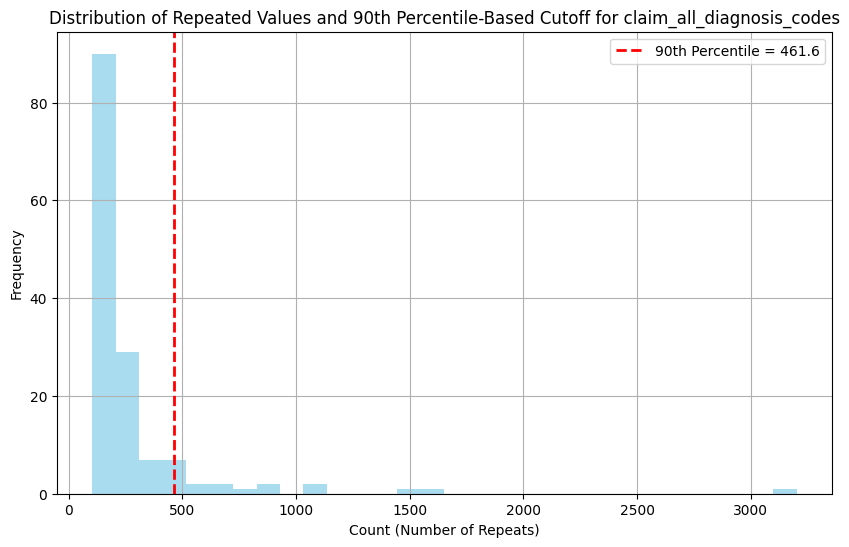

In [11]:
mx_submits_eda.plot_percentile_based_cutoff("claim_all_diagnosis_codes",90,cutoff_length=5)

In [12]:
mx_submits_claim_all_diagnosis_codes_repeat_count = mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes")
mx_submits_claim_all_diagnosis_codes_repeat_count

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
1,"(ICD10, I10, 1)",4651,I10,3.0
2,"(ICD10, I10, 2)",4584,I10,3.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
4,"(ICD10, I10, 3)",3740,I10,3.0
...,...,...,...,...
46888,"(None, 79902, 14)",1,79902,5.0
46889,"(ICD10, L919, 1)",1,L919,4.0
46890,"(ICD10, R32, 13)",1,R32,3.0
46891,"(ICD10, F429, 10)",1,F429,4.0


In [13]:
most_repeated_diagnosis = mx_submits_claim_all_diagnosis_codes_repeat_count[
    (mx_submits_claim_all_diagnosis_codes_repeat_count["diagnosis_code_length"] == 5) & 
    (mx_submits_claim_all_diagnosis_codes_repeat_count["count"] > 461)
]
most_repeated_diagnosis_list = most_repeated_diagnosis['diagnosis_code'].tolist()
most_repeated_diagnosis

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
5,"(ICD10, F1120, 1)",3573,F1120,5.0
13,"(ICD10, Z1231, 1)",1944,Z1231,5.0
14,"(ICD10, R6889, 1)",1935,R6889,5.0
28,"(ICD10, Z1211, 1)",1202,Z1211,5.0
29,"(ICD10, I2510, 1)",1152,I2510,5.0
43,"(ICD10, R0602, 1)",956,R0602,5.0
48,"(ICD10, M6281, 2)",889,M6281,5.0
57,"(ICD10, R0789, 1)",800,R0789,5.0


In [14]:
most_repeated_diagnosis = mx_submits_claim_all_diagnosis_codes_repeat_count[mx_submits_claim_all_diagnosis_codes_repeat_count["count"]>=531]
most_repeated_diagnosis

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
1,"(ICD10, I10, 1)",4651,I10,3.0
2,"(ICD10, I10, 2)",4584,I10,3.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
4,"(ICD10, I10, 3)",3740,I10,3.0
...,...,...,...,...
98,"(ICD10, J441, 1)",544,J441,4.0
99,"(ICD10, J189, 1)",540,J189,4.0
100,"(ICD10, Z452, 1)",539,Z452,4.0
101,"(ICD10, F4323, 1)",534,F4323,5.0


 - (ICD10, Z0001, 1): Encounter for general adult medical examination with abnormal findings
 - (ICD10, F4323, 1): Adjustment disorder with depressed mood
 - (ICD10, Z452, 1)	: Pneumonia, unspecified organism
 - (ICD10, J441, 1)	: Chronic obstructive pulmonary disease with acute exacerbation

In [15]:
mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes",5)

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5
1,"(ICD10, I10, 1)",4651,I10,3
2,"(ICD10, I10, 2)",4584,I10,3
3,"(ICD10, Z0000, 1)",3802,Z0000,5
4,"(ICD10, I10, 3)",3740,I10,3


In [16]:
type_of_bill_facility_description_eda = mx_submits_eda.get_fill_counts_for_unique_values("type_of_bill_facility_description")
type_of_bill_facility_description_eda

,Unique Value,Column,type_count,Non-null Count,Percent Non-null
0,Skilled Nursing,claim_number,721,721,100.000000
1,Skilled Nursing,cohort_key,721,721,100.000000
2,Skilled Nursing,cohort_record_id,721,721,100.000000
3,Skilled Nursing,attending_provider_npi,721,112,15.533981
4,Skilled Nursing,billing_provider_address_cbsa_name,721,465,64.493759
...,...,...,...,...,...
877,None,patient_id,213257,213244,99.993904
878,None,patient_location_preferred_latitude,213257,188763,88.514328
879,None,patient_location_preferred_longitude,213257,188763,88.514328
880,None,patient_location_preferred_zipcode,213257,188763,88.514328


In [17]:
type_of_bill_facility_description_eda[type_of_bill_facility_description_eda["Column"]=='facility_provider_address_city']

,Unique Value,Column,type_count,Non-null Count,Percent Non-null
37,Skilled Nursing,facility_provider_address_city,721,5,0.693481
163,Intermediate Care,facility_provider_address_city,10,0,0.000000
289,Hospital,facility_provider_address_city,23494,457,1.945177
415,Home Health,facility_provider_address_city,2873,0,0.000000
541,"Specialty Facility, Hospital ASC Surgery",facility_provider_address_city,2196,202,9.198543
667,Clinic,facility_provider_address_city,4783,651,13.610705
793,None,facility_provider_address_city,213257,78679,36.893982


### MX SUBMITS LINE

#### EDA

In [5]:
mx_submits_line_eda = EDAAnalyzer(mx_submits_line_spark_manager)

In [6]:
mx_submits_line_eda.display_head()

24/10/02 21:09:08 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,billing_provider_address_precision,billing_provider_address_region,billing_provider_address_state,...,line_level_procedure_modifier_1,line_level_procedure_modifier_2,line_level_procedure_modifier_3,line_level_procedure_modifier_4,line_level_procedure_category,line_level_revenue_code,line_level_revenue_description,line_level_from_date,line_level_to_date,line_level_units_billed
0,None,"ELKHART-GOSHEN, IN",Goshen,Elkhart,200HIGHPARKAVEGOSHENIN46526,41.563358,-85.830498,Rooftop,Midwest,IN,...,None,None,None,None,PATHOLOGY AND LABORATORY - ORGAN OR DISEASE-OR...,0301,Laboratory,2023-12-29,2023-12-29,1.00
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,SUPPLEMENTAL TRACKING(CATEGORY II) - PATIENT H...,0572,None,2021-07-01,2021-07-01,1.00
2,None,"NEW YORK-NEWARK-JERSEY CITY, NY-NJ-PA",Raritan,Somerset,691STAVERARITANNJ08869,40.56961,-74.63822,Zip9,Northeast,NJ,...,None,None,None,None,None,None,None,2016-02-25,2016-02-25,1.00
3,None,None,Stowe,Lamoille,1878MOUNTAINRDSTOWEVT05672,44.474545,-72.713554,Rooftop,Northeast,VT,...,None,None,None,None,EVALUATION AND MANAGEMENT - PROLONGED SERVICES,None,None,2021-07-26,2021-07-26,1.00
4,None,"PHOENIX-MESA-CHANDLER, AZ",Chandler,Maricopa,3960ERIGGSRDCHANDLERAZ85249,33.219654,-111.774361,Rooftop,West,AZ,...,None,None,None,None,SUPPLEMENTAL TRACKING(CATEGORY II) - PATIENT H...,None,None,2024-08-06,2024-08-06,1.00


In [7]:
mx_submits_line_eda.display_shape()

'Shape of data: rows: 649030, cols: 150'

In [ ]:
column_info_submits_line = mx_submits_line_eda.display_column_info()
column_info_submits_line.to_csv("../output/column_info_submits_line.csv")
column_info_submits_line

### Feature Engineering

In [5]:
mx_submits_fe=FeatureEngineer(mx_submits_spark_manager)

In [6]:
mx_submits_fe.transform_claim_all_diagnosis_codes()

,claim_all_diagnosis_ohe
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


In [7]:
mx_submits_fe.add_comorbidities_with_exponential_decay_sparse_vector()

,previous_diagnosis_ohe
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
mx_submits_fe.add_continuous_visit_years()
mx_submits_fe.display_top_rows_as_pandas("continuous_visit_years")

,continuous_visit_years
0,1
1,1
2,1
3,2
4,1


In [9]:
# mx_submits_fe.remove_diagnosis_codes(most_repeated_diagnosis_list)

In [10]:
mx_submits_fe.retain_columns(features_cols)

In [11]:
mx_submits_fe.convert_columns_to_float(["claim_total_charge_amount"])
preprocess_data = mx_submits_fe.preprocess_data(exclude_cols=exclude_cols)
preprocess_data

Casted claim_total_charge_amount to float


One-Hot Encoding applied successfully to column: secondary_payer_state
One-Hot Encoding applied successfully to column: billing_provider_address_precision
One-Hot Encoding applied successfully to column: billing_provider_address_region
One-Hot Encoding applied successfully to column: claim_filing_indicator_pay_type
One-Hot Encoding applied successfully to column: claim_institutional_or_professional
One-Hot Encoding applied successfully to column: facility_provider_address_precision
One-Hot Encoding applied successfully to column: facility_provider_address_region
One-Hot Encoding applied successfully to column: inpatient_discharge_status_code
One-Hot Encoding applied successfully to column: organization_npi_type_code
One-Hot Encoding applied successfully to column: organization_sourced_from
One-Hot Encoding applied successfully to column: organization_taxonomy_group
One-Hot Encoding applied successfully to column: patient_gender
One-Hot Encoding applied successfully to column: patient_l

Preprocessing complete. Feature vector created.


In [12]:
columns_df = mx_submits_fe.get_columns_as_pandas_df()
columns_df['Column Names'].to_list()
feature_cols = mx_submits_fe.get_feature_columns()
feature_cols

['secondary_payer_state_ohe',
 'billing_provider_address_precision_ohe',
 'billing_provider_address_region_ohe',
 'claim_filing_indicator_pay_type_ohe',
 'claim_institutional_or_professional_ohe',
 'facility_provider_address_precision_ohe',
 'facility_provider_address_region_ohe',
 'inpatient_discharge_status_code_ohe',
 'organization_npi_type_code_ohe',
 'organization_sourced_from_ohe',
 'organization_taxonomy_group_ohe',
 'patient_gender_ohe',
 'patient_location_residential_region_ohe',
 'primary_payer_pay_type_ohe',
 'primary_payer_plan_type_ohe',
 'principal_diagnosis_body_part_ohe',
 'principal_diagnosis_category_ohe',
 'principal_diagnosis_code_set_ohe',
 'principal_procedure_code_set_ohe',
 'referring_provider_taxonomy_group_ohe',
 'rendering_provider_npi_type_code_ohe',
 'rendering_provider_taxonomy_group_ohe',
 'secondary_payer_claim_filing_indicator_code_ohe',
 'secondary_payer_pay_type_ohe',
 'secondary_payer_plan_type_ohe',
 'claim_total_charge_amount',
 'previous_diagnosis

In [13]:
# mx_submits_fe.display_head()

In [14]:
# mx_submits_fe.reduce_dataframe_size()
mx_submits_fe.train_autoencoder()

24/10/04 01:38:37 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


input_features : 14007
Approximate distinct count: 247334
Steps per epoch: 966


24/10/04 01:38:53 WARN DAGScheduler: Broadcasting large task binary with size 1739.8 KiB
24/10/04 02:05:51 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:06:07 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


Epoch 1/50


24/10/04 02:06:13 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:06:27 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:06:30 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:06:45 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:06:48 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:06:59 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 51s - loss: 0.2152 - 51s/epoch - 53ms/step
Epoch 2/50


24/10/04 02:07:01 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:07:11 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:07:14 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:07:25 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:07:27 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:07:39 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:07:41 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:07:54 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 56s - loss: 0.1757 - 56s/epoch - 58ms/step
Epoch 3/50


24/10/04 02:07:56 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:08:17 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:08:23 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:08:34 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:08:36 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:08:46 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:08:47 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:08:57 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 62s - loss: 0.2105 - 62s/epoch - 64ms/step
Epoch 4/50


24/10/04 02:08:58 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:09:07 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:09:08 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:09:19 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:09:20 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:09:29 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:09:31 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:09:40 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 43s - loss: 0.2137 - 43s/epoch - 44ms/step
Epoch 5/50


24/10/04 02:09:41 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:09:52 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:09:53 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:10:03 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:10:04 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:10:15 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:10:17 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 37s - loss: 0.2152 - 37s/epoch - 39ms/step
Epoch 6/50


24/10/04 02:10:26 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:10:27 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:10:36 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:10:38 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:10:47 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:10:48 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:10:58 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:10:59 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 42s - loss: 0.2093 - 42s/epoch - 43ms/step
Epoch 7/50


24/10/04 02:11:09 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:11:10 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:11:20 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:11:21 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:11:30 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:11:31 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:11:39 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 41s - loss: 0.1792 - 41s/epoch - 42ms/step
Epoch 8/50


24/10/04 02:11:41 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:11:50 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:11:51 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:12:00 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:12:02 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:12:11 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:12:12 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:12:21 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 41s - loss: 0.2092 - 41s/epoch - 42ms/step
Epoch 9/50


24/10/04 02:12:22 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:12:31 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:12:32 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:12:41 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:12:42 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:12:51 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:12:52 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 33s - loss: 0.2155 - 33s/epoch - 34ms/step
Epoch 10/50


24/10/04 02:13:02 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:13:03 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:13:13 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:13:14 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:13:24 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:13:25 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:13:35 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:13:37 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 43s - loss: 0.2138 - 43s/epoch - 45ms/step
Epoch 11/50


24/10/04 02:13:46 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:13:47 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:13:57 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:13:58 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:14:08 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:14:09 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:14:19 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:14:20 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 43s - loss: 0.1754 - 43s/epoch - 44ms/step
Epoch 12/50


24/10/04 02:14:29 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:14:31 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:14:40 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:14:42 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:14:52 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:14:55 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:15:05 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 46s - loss: 0.2086 - 46s/epoch - 48ms/step
Epoch 13/50


24/10/04 02:15:06 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:15:16 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:15:18 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:15:27 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:15:29 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:15:39 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:15:41 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:15:50 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 45s - loss: 0.2151 - 45s/epoch - 46ms/step
Epoch 14/50


24/10/04 02:15:52 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:16:01 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:16:02 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:16:12 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:16:13 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:16:22 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:16:23 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 33s - loss: 0.2147 - 33s/epoch - 35ms/step
Epoch 15/50


24/10/04 02:16:33 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:16:34 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:16:45 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:16:46 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:16:55 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:16:56 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:17:05 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:17:06 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 42s - loss: 0.1743 - 42s/epoch - 44ms/step
Epoch 16/50


24/10/04 02:17:16 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:17:17 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:17:26 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:17:27 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:17:37 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:17:38 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:17:47 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 42s - loss: 0.2114 - 42s/epoch - 43ms/step
Epoch 17/50


24/10/04 02:17:48 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:17:57 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:17:58 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:18:07 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:18:09 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:18:17 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:18:18 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:18:27 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 40s - loss: 0.2118 - 40s/epoch - 41ms/step
Epoch 18/50


24/10/04 02:18:29 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:18:38 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:18:39 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:18:49 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:18:50 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:18:59 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:19:01 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 34s - loss: 0.2153 - 34s/epoch - 35ms/step
Epoch 19/50


24/10/04 02:19:09 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:19:10 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:19:20 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:19:21 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:19:31 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:19:32 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:19:41 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:19:43 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 41s - loss: 0.2133 - 41s/epoch - 43ms/step
Epoch 20/50


24/10/04 02:19:52 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:19:53 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:20:02 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:20:04 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:20:13 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:20:14 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:20:23 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 41s - loss: 0.1748 - 41s/epoch - 42ms/step
Epoch 21/50


24/10/04 02:20:24 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:20:33 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:20:35 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:20:44 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:20:45 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:20:55 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:20:56 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:21:07 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 44s - loss: 0.2096 - 44s/epoch - 45ms/step
Epoch 22/50


24/10/04 02:21:08 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:21:17 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:21:18 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:21:26 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:21:28 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:21:37 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:21:38 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:21:47 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 40s - loss: 0.2150 - 40s/epoch - 41ms/step
Epoch 23/50


24/10/04 02:21:48 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:21:57 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:21:58 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:22:07 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:22:08 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:22:17 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:22:18 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 32s - loss: 0.2143 - 32s/epoch - 33ms/step
Epoch 24/50


24/10/04 02:22:28 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:22:29 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:22:39 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:22:40 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:22:49 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:22:50 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:23:00 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:23:01 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 42s - loss: 0.1745 - 42s/epoch - 44ms/step
Epoch 25/50


24/10/04 02:23:11 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:23:13 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:23:22 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:23:24 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:23:34 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:23:35 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:23:46 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 45s - loss: 0.2101 - 45s/epoch - 47ms/step
Epoch 26/50


24/10/04 02:23:47 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:23:57 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:23:58 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:24:08 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:24:09 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:24:19 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:24:20 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:24:30 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 44s - loss: 0.2133 - 44s/epoch - 45ms/step
Epoch 27/50


24/10/04 02:24:31 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:24:40 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:24:42 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:24:52 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:24:54 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:25:04 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:25:05 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 35s - loss: 0.2149 - 35s/epoch - 37ms/step
Epoch 28/50


24/10/04 02:25:15 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:25:17 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:25:26 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:25:27 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:25:38 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:25:39 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:25:49 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:25:50 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 44s - loss: 0.2099 - 44s/epoch - 46ms/step
Epoch 29/50


24/10/04 02:26:00 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:26:01 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:26:11 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:26:12 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:26:22 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:26:24 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:26:34 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 44s - loss: 0.1782 - 44s/epoch - 46ms/step
Epoch 30/50


24/10/04 02:26:35 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:26:45 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:26:46 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:26:56 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:26:58 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:27:08 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:27:09 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:27:19 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 45s - loss: 0.2090 - 45s/epoch - 46ms/step
Epoch 31/50


24/10/04 02:27:20 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:27:29 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:27:31 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:27:41 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:27:42 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:27:50 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:27:51 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 34s - loss: 0.2154 - 34s/epoch - 35ms/step
Epoch 32/50


24/10/04 02:28:00 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:28:02 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:28:11 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:28:13 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:28:23 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:28:24 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:28:33 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:28:34 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 42s - loss: 0.2139 - 42s/epoch - 43ms/step
Epoch 33/50


24/10/04 02:28:44 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:28:45 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:28:55 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:28:56 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:29:05 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:29:06 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:29:17 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:29:18 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 43s - loss: 0.1753 - 43s/epoch - 44ms/step
Epoch 34/50


24/10/04 02:29:27 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:29:29 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:29:38 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:29:39 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:29:48 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:29:50 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:29:59 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 42s - loss: 0.2100 - 42s/epoch - 44ms/step
Epoch 35/50


24/10/04 02:30:01 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:30:11 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:30:13 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:30:23 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:30:24 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:30:33 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:30:35 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:30:44 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 44s - loss: 0.2134 - 44s/epoch - 46ms/step
Epoch 36/50


24/10/04 02:30:45 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:30:56 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:30:57 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:31:07 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:31:08 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:31:18 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:31:19 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 36s - loss: 0.2147 - 36s/epoch - 37ms/step
Epoch 37/50


24/10/04 02:31:30 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:31:31 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:31:41 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:31:42 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:31:52 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:31:54 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:32:04 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:32:05 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 45s - loss: 0.1741 - 45s/epoch - 46ms/step
Epoch 38/50


24/10/04 02:32:15 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:32:17 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:32:34 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:32:35 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:32:52 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:32:53 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:33:03 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 59s - loss: 0.2127 - 59s/epoch - 61ms/step
Epoch 39/50


24/10/04 02:33:05 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:33:15 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:33:17 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:33:25 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:33:27 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:33:37 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:33:38 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:33:47 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 43s - loss: 0.2103 - 43s/epoch - 45ms/step
Epoch 40/50


24/10/04 02:33:48 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:33:58 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:33:59 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:34:10 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:34:11 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:34:22 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:34:23 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 36s - loss: 0.2153 - 36s/epoch - 38ms/step
Epoch 41/50


24/10/04 02:34:32 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:34:34 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:34:44 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:34:45 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:34:55 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:34:57 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:35:07 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:35:08 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 45s - loss: 0.2135 - 45s/epoch - 47ms/step
Epoch 42/50


24/10/04 02:35:19 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:35:20 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:35:30 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:35:32 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:35:42 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:35:43 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:35:53 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:35:54 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 45s - loss: 0.1754 - 45s/epoch - 46ms/step
Epoch 43/50


24/10/04 02:36:04 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:36:05 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:36:14 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:36:15 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:36:25 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:36:26 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:36:36 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 43s - loss: 0.2086 - 43s/epoch - 44ms/step
Epoch 44/50


24/10/04 02:36:37 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:36:47 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:36:48 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:36:58 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:36:59 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:37:09 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:37:10 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:37:19 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 42s - loss: 0.2151 - 42s/epoch - 44ms/step
Epoch 45/50


24/10/04 02:37:20 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:37:29 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:37:31 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:37:40 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:37:41 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:37:50 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:37:51 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 33s - loss: 0.2144 - 33s/epoch - 34ms/step
Epoch 46/50


24/10/04 02:38:02 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:38:03 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:38:13 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:38:14 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:38:24 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:38:26 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:38:37 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:38:39 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 47s - loss: 0.1742 - 47s/epoch - 49ms/step
Epoch 47/50


24/10/04 02:38:48 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:38:50 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:39:00 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:39:01 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:39:10 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:39:12 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:39:23 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 45s - loss: 0.2104 - 45s/epoch - 46ms/step
Epoch 48/50


24/10/04 02:39:24 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:39:34 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:39:36 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:39:46 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:39:48 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:39:58 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:39:59 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:40:10 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


966/966 - 47s - loss: 0.2128 - 47s/epoch - 49ms/step
Epoch 49/50


24/10/04 02:40:12 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:40:22 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:40:23 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:40:33 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:40:35 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:40:44 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:40:46 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 35s - loss: 0.2149 - 35s/epoch - 37ms/step
Epoch 50/50


24/10/04 02:40:55 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:40:56 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:41:06 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:41:07 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:41:16 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:41:18 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB
24/10/04 02:41:27 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB
24/10/04 02:41:29 WARN DAGScheduler: Broadcasting large task binary with size 1755.6 KiB


966/966 - 43s - loss: 0.2104 - 43s/epoch - 44ms/step


24/10/04 02:41:38 WARN DAGScheduler: Broadcasting large task binary with size 1751.0 KiB


Training complete.


In [ ]:
corr_features = mx_submits_fe.plot_correlation_heatmap()
corr_features.to_csv("../output/feature_correlation.csv")

24/10/04 02:41:40 WARN DAGScheduler: Broadcasting large task binary with size 1742.4 KiB


In [ ]:
mx_submits_fe.get_sorted_feature_correlations().head(20)

In [16]:
mx_submits_fe.get_sorted_feature_correlations().head(20)

24/10/04 01:11:54 WARN DAGScheduler: Broadcasting large task binary with size 1527.7 KiB


32/32 [==============================] - 0s 1ms/step


,Feature,Average Correlation with Dense Layer
347,347,0.438613
86,86,0.295317
120,120,0.222609
90,90,0.156396
240,240,0.147496
11242,11242,0.115945
281,281,0.112414
239,239,0.110201
112,112,0.108094
14,14,0.105733


In [17]:
sample_patient_info = mx_submits_fe.get_rows_by_column_value("patient_id",sample_patient_id)
sample_patient_info.to_csv("../output/sample_patient_info.csv")
sample_patient_info

24/10/04 01:17:46 WARN DAGScheduler: Broadcasting large task binary with size 1535.5 KiB


,secondary_payer_state,billing_provider_address_precision,billing_provider_address_region,claim_filing_indicator_pay_type,claim_institutional_or_professional,facility_provider_address_precision,facility_provider_address_region,inpatient_discharge_status_code,organization_npi_type_code,organization_sourced_from,...,principal_diagnosis_code_set_ohe,principal_procedure_code_set_ohe,referring_provider_taxonomy_group_ohe,rendering_provider_npi_type_code_ohe,rendering_provider_taxonomy_group_ohe,secondary_payer_claim_filing_indicator_code_ohe,secondary_payer_pay_type_ohe,secondary_payer_plan_type_ohe,features,features_array


In [15]:
mx_submits_fe.display_shape()

24/10/03 22:38:54 WARN DAGScheduler: Broadcasting large task binary with size 1745.6 KiB


'Shape of data: rows: 247334, cols: 82'

In [ ]:
%autoreload 2